# Housing Prices: Can you predict the home sales prices in Melbourne?

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the Data

In [2]:
# Remove redundant/unique information
dfHousePrices = pd.read_csv("house_prices.csv", usecols = ['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Seller', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'RegionName', 'PropertyCount', 'Postcode']) 
dfHousePrices.head()

,Suburb,Rooms,Type,Price,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
0,Abbotsford,2,h,1480000,S,Biggin,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,Northern Metropolitan,4019
1,Abbotsford,2,h,1035000,S,Biggin,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,3,h,1465000,SP,Biggin,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,850000,PI,Biggin,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000,VB,Nelson,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019


In [3]:
dfHousePrices.shape
dfHousePrices.describe()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000


## Clean the Data

In [4]:
import math
# We need to fill empty values on year built, built area and car
median_year_built = math.floor(dfHousePrices.YearBuilt.median())
median_year_built
dfHousePrices.YearBuilt = dfHousePrices.YearBuilt.fillna(median_year_built)

In [5]:
median_car = math.floor(dfHousePrices.Car.median())
median_car
dfHousePrices.Car = dfHousePrices.Car.fillna(median_car)

In [6]:
median_building_area = math.floor(dfHousePrices.BuildingArea.median())
median_building_area
dfHousePrices.BuildingArea = dfHousePrices.BuildingArea.fillna(median_building_area)

In [7]:
# For council area I don't want discrepancies with other location data, so rows with empty cells will get dropped
dfHousePrices = dfHousePrices[dfHousePrices['CouncilArea'].notna()]

In [8]:
# Delete rows with 0 as landsize
dfHousePrices = dfHousePrices[dfHousePrices.Landsize != 0]

In [9]:
# Check data to see if we all empty cells are filled
dfHousePrices.describe(include='all')

,Suburb,Rooms,Type,Price,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
count,10272,10272.000000,10272,1.027200e+04,10272,10272,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272,10272,10272.000000
unique,305,NaN,3,NaN,5,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,8,NaN
top,Reservoir,NaN,h,NaN,S,Nelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,Southern Metropolitan,NaN
freq,301,NaN,8033,NaN,7017,1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,3303,NaN
mean,NaN,3.068536,NaN,1.142861e+06,NaN,NaN,10.402434,3102.092971,3.038162,1.570678,1.659073,647.930199,141.715375,1965.026967,NaN,NaN,7304.301889
std,NaN,0.899147,NaN,6.493972e+05,NaN,NaN,5.578720,91.127321,0.916483,0.707189,0.985341,4548.807775,101.695480,30.162665,NaN,NaN,4392.989470
min,NaN,1.000000,NaN,1.310000e+05,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1196.000000,NaN,NaN,249.000000
25%,NaN,3.000000,NaN,7.100000e+05,NaN,NaN,6.700000,3044.000000,2.000000,1.000000,1.000000,258.000000,126.000000,1960.000000,NaN,NaN,4019.000000
50%,NaN,3.000000,NaN,9.675000e+05,NaN,NaN,9.850000,3081.000000,3.000000,1.000000,2.000000,516.000000,126.000000,1970.000000,NaN,NaN,6482.000000
75%,NaN,4.000000,NaN,1.400000e+06,NaN,NaN,13.000000,3146.000000,4.000000,2.000000,2.000000,670.000000,137.000000,1970.000000,NaN,NaN,9704.000000


In [10]:
# Run this commands to check for typos on categorical data
unique_types_suburb = set(dfHousePrices['Suburb'].unique())
unique_types_suburb
unique_types_seller = set(dfHousePrices['Seller'].unique())
unique_types_seller
unique_types_council_area = set(dfHousePrices['CouncilArea'].unique())
unique_types_council_area
unique_types_region_name = set(dfHousePrices['RegionName'].unique())
unique_types_region_name
unique_types_type = set(dfHousePrices['Type'].unique())
unique_types_type
# Fortunately, there are no typos and unique values are correct

{'h', 't', 'u'}

In [11]:
dfHousePrices.dtypes

Suburb            object
Rooms              int64
Type              object
Price              int64
Method            object
Seller            object
Distance         float64
Postcode           int64
Bedroom            int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
RegionName        object
PropertyCount      int64
dtype: object

## Exploratory Data Analysis - 1st Part 

<AxesSubplot:>

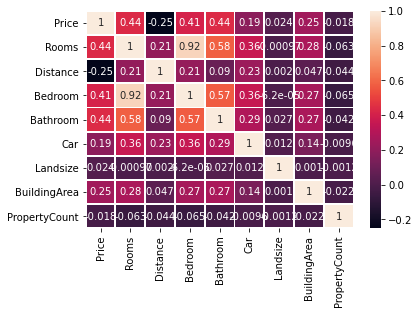

In [12]:
# Find correlations between continous variables (IV and DV)
X = dfHousePrices[['Price', 'Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'PropertyCount']]
sns.heatmap(X.corr(),annot=True,lw=1)

## Build the model - 1st Part

In [13]:
X = dfHousePrices[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']]

In [14]:
Y = dfHousePrices['Price']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6163, 6)
(4109, 6)
(6163,)
(4109,)


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Rooms,236505.665574
Distance,-43529.127991
Bathroom,225562.279396
Car,52646.923733
Landsize,2.376645
BuildingArea,531.643953


In [18]:
# Print the intercept
print(model.intercept_)

360564.808286401


In [19]:
predictions = model.predict(X_test)
predictions

array([1591207.329957  , 1675408.08757592, 1520493.42450145, ...,
       1757506.19761488, 1099322.57289164, 1310125.88500423])

<AxesSubplot:ylabel='Price'>

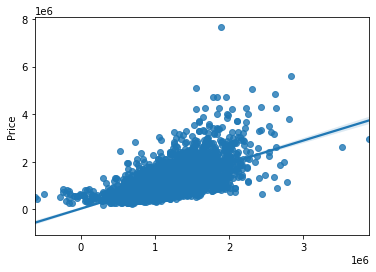

In [20]:
sns.regplot(x=predictions, y=y_test)

In [21]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:40:34   Log-Likelihood:                -90039.
No. Observations:                6163   AIC:                         1.801e+05
Df Residuals:                    6156   BIC:                         1.801e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.606e+05   2.59e+04     13.910   

## Exploratory Data Analysis - 2nd Part

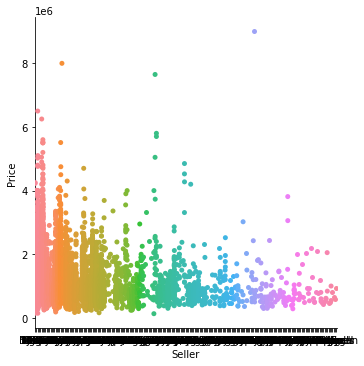

In [22]:
sns.catplot(x="Seller", y="Price", data=dfHousePrices, height=5)

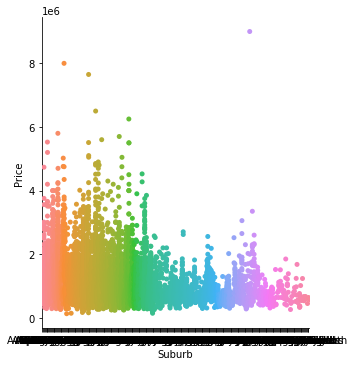

In [23]:
sns_plot = sns.catplot(x="Suburb", y="Price", data=dfHousePrices, height=5)
# sns_plot.savefig("output.png")

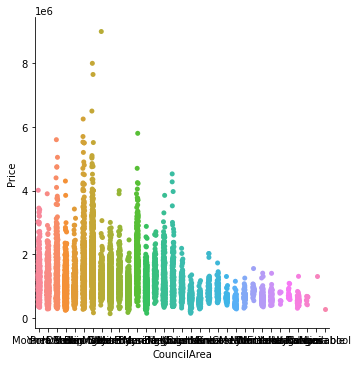

In [24]:
sns.catplot(x="CouncilArea", y="Price", data=dfHousePrices, height=5)

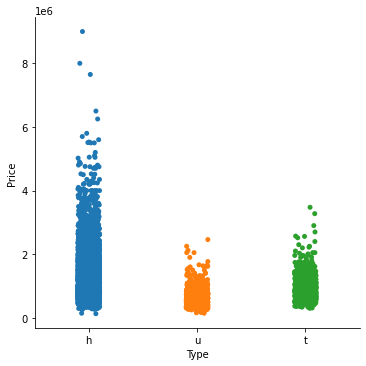

In [25]:
sns.catplot(x="Type", y="Price", data=dfHousePrices, height=5)

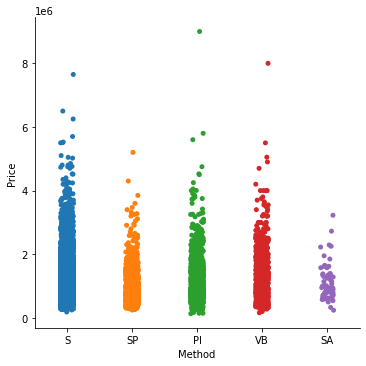

In [26]:
sns.catplot(x="Method", y="Price", data=dfHousePrices, height=5)

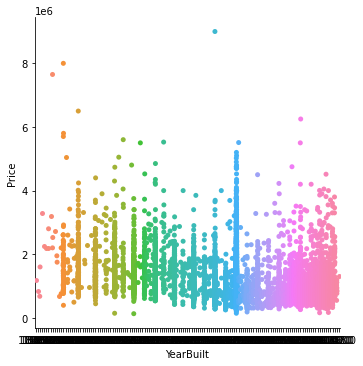

In [27]:
sns.catplot(x="YearBuilt", y="Price", data=dfHousePrices, height=5)

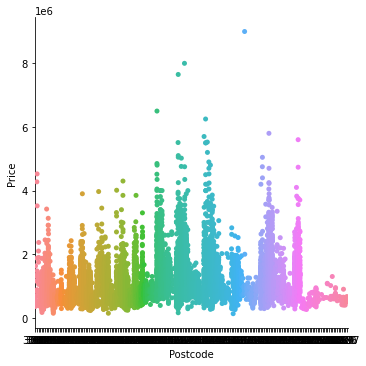

In [28]:
sns.catplot(x="Postcode", y="Price", data=dfHousePrices, height=5)

In [29]:
#dfHousePrices['Suburb'] = dfHousePrices['Suburb'].astype('category')
#dfHousePrices['Type'] = dfHousePrices['Type'].astype('category')
#dfHousePrices['Method'] = dfHousePrices['Method'].astype('category')
#dfHousePrices['Seller'] = dfHousePrices['Seller'].astype('category')
#dfHousePrices['CouncilArea'] = dfHousePrices['CouncilArea'].astype('category')
#dfHousePrices['RegionName'] = dfHousePrices['RegionName'].astype('category')

## Build the model - 2nd Part

In [30]:
# List independent variables
X = dfHousePrices[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'PropertyCount', 'Type', 'Method', 'Seller', 'CouncilArea', 'RegionName']]
# Add dummy vars for cat vars
X = pd.get_dummies(data=X, drop_first=True)
# New dataframe
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,PropertyCount,Type_t,Type_u,Method_S,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,RegionName_Eastern Victoria,RegionName_Northern Metropolitan,RegionName_Northern Victoria,RegionName_South-Eastern Metropolitan,RegionName_Southern Metropolitan,RegionName_Western Metropolitan,RegionName_Western Victoria
0,2,2.5,1,1.0,202,126.0,4019,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,2,2.5,1,0.0,156,79.0,4019,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,3,2.5,2,0.0,134,150.0,4019,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,3,2.5,2,1.0,94,126.0,4019,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,4,2.5,1,2.0,120,142.0,4019,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [31]:
# Dependent variable
Y = dfHousePrices['Price']
Y

0        1480000
1        1035000
2        1465000
3         850000
4        1600000
          ...   
12206    1050000
12208    1285000
12210     525300
12211     750000
12212    2450000
Name: Price, Length: 10272, dtype: int64

In [32]:
# Create the test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6163, 288)
(4109, 288)
(6163,)
(4109,)


In [33]:
# Perform the regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
# Print the intercept
print(model.intercept_)

595512.4755647061


In [35]:
# Print all other parameters
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter
coeff_parameter.to_csv (r'/Users/alejandrogleason/Downloads/Coefficents.csv ')

In [36]:
predictions = model.predict(X_test)
predictions

array([1403836.26372661, 1325754.30293877, 1221592.32567192, ...,
       1564572.91262582,  940903.69314997, 1046661.74272207])

In [37]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     43.38
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:41:18   Log-Likelihood:                -88251.
No. Observations:                6163   AIC:                         1.770e+05
Df Residuals:                    5912   BIC:                         1.787e+05
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Alejandro Gleason Méndez - ag77698